In [131]:
!pip install git+https://github.com/sat28/githubcommit.git


  Cloning https://github.com/sat28/githubcommit.git to /tmp/pip-req-build-5fcilbvt
    100% |████████████████████████████████| 450kB 7.6MB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 10.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for githubcommit ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-agg9hau1/wheels/9b/e7/4a/aa6a616dc7cc65dfcd309a19e5b5e1b482825457b8df38d0ca
Successfully built githubcommit
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/lib/python3.6/dist-packages/smmap2-2.0.3.dist-info'
Consider using the `--user` option or check the permissions.



In [4]:

#from imutils import contours
#!pip install -q cv2
from skimage import measure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import os
from PIL import Image
from os import listdir

In [120]:
#file1=open('file1.txt','r')
#file2=open('file2.txt','r')
#obj=[file1.read(), file2.read()]
#cPickle.dump(obj,open('result.i2','w'),2)
df = pd.read_pickle("ash.pkl")
print(df)
neural_ip = np.zeros((405))

   Participant_id Age Gender Occupation Size_Index Size_thumb           time  \
0              P2  24      F    student      12.07      15.18  1528646344475   
1              P2  24      F    student      12.07      15.18  1528646344475   
2              P2  24      F    student      12.07      15.18  1528646344475   
3              P2  24      F    student      12.07      15.18  1528646344475   
4              P2  24      F    student      12.07      15.18  1528646344475   
5              P2  24      F    student      12.07      15.18  1528646344475   
6              P2  24      F    student      12.07      15.18  1528646344475   
0              P2  24      F    student      12.07      15.18  1528646346238   
1              P2  24      F    student      12.07      15.18  1528646346238   
2              P2  24      F    student      12.07      15.18  1528646346238   
3              P2  24      F    student      12.07      15.18  1528646346238   
4              P2  24      F    student 

In [128]:

print(df[(((df.x_curr - df.x_actual_down) > 100) | ((df.y_curr - df.y_actual_down) > 200))])

   Participant_id Age Gender Occupation Size_Index Size_thumb           time  \
0              P2  24      F    student      12.07      15.18  1528647967654   
1              P2  24      F    student      12.07      15.18  1528647967654   
2              P2  24      F    student      12.07      15.18  1528647967654   
3              P2  24      F    student      12.07      15.18  1528647967654   
4              P2  24      F    student      12.07      15.18  1528647967654   
5              P2  24      F    student      12.07      15.18  1528647967654   
6              P2  24      F    student      12.07      15.18  1528647967654   
7              P2  24      F    student      12.07      15.18  1528647967654   
8              P2  24      F    student      12.07      15.18  1528647967654   
9              P2  24      F    student      12.07      15.18  1528647967654   
10             P2  24      F    student      12.07      15.18  1528647967654   
11             P2  24      F    student 

In [85]:
input_array = []
aray2 = []
neural_ip = []
for index,row in df.iterrows():
    #x[x<10] = 0
    if(index > 100):
        break
    x = row['array']
    x = np.fromstring(x[1:-1], sep=",")
    b = np.asarray(x).reshape(27,15)
    thresh = cv2.threshold(b, 10, 255, cv2.THRESH_BINARY)[1]
    labels = measure.label(thresh, neighbors=8, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    for label in np.unique(labels):                
        if label == 0:
            continue 
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        if numPixels > 5:
            mask = cv2.add(mask, labelMask)
    flat_mat = mask.flatten()
    idx = np.nonzero(flat_mat)
    repl_mat = np.zeros(flat_mat.shape,dtype = "uint8")
    for i in idx:
        repl_mat[idx] = x[idx]
    #neural_ip = np.vstack((neural_ip,repl_mat))
    neural_ip.append(repl_mat)
    
#aray2 = neural_ip[1::]
#print(neural_ip)
aray2 = neural_ip.copy()
print(np.shape(neural_ip))
#plt.imshow(aray2[0].reshape((27,15)),cmap='gray')

#fig = plt.figure()
#for i in range(0,len(aray2)):
#    plt.imshow(aray2[i].reshape((27,15)),cmap='gray')
    #fig.savefig("Img{}.png".format(i))

(4277, 405)


In [86]:
aray2_np = np.asarray(aray2)
aray2 = aray2_np[~np.all(aray2_np == 0,axis = 1)]
print(np.shape(aray2))

(4074, 405)


(4074, 405)














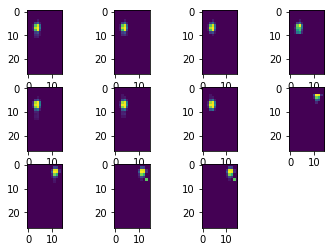

In [88]:
print(np.shape(aray2))
rows = np.shape(aray2)[0]/2
cols =np.shape(aray2)[0] - rows
for i, el in enumerate(aray2):
    #moving axis to use plt: i.e [4,100,100] to [100,100,4]
    print()
    if (i > 10):
        break
    array2 = np.moveaxis(aray2[i], 0, -1)
    
    
    plt.subplot(3,4, i + 1)
    plt.imshow(np.reshape(array2,(27,15))) 
    #plt.savefig(('plot{}',i))
    plt.imsave("iteration{}.png".format(i),np.reshape(array2,(27,15)),cmap='gray')

plt.show()


In [19]:
print(aray2[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  89. 139.  37.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 114. 156.  49.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 112. 182.  33.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  29.  44.
  11.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  15.
  13.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 